# **1**

# **Import Required Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# **Load the Iris Dataset**

In [ ]:
iris = load_iris()
X = iris.data      # features
y = iris.target    # labels


# **Split the Dataset (80% – 20%)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


# **Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Define the Neural Network**

In [ ]:
model = MLPClassifier(
    hidden_layer_sizes=(16,),  # 1 hidden layer, 16 neurons
    activation='relu',         # ReLU activation
    solver='adam',             # Adam optimizer
    max_iter=200,              # 200 epochs
    random_state=42
)


# **Train the Network**

In [ ]:
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(16,), random_state=42)

# **Print Model Summary**

In [ ]:
print("Feed-Forward Neural Network Summary")
print("-----------------------------------")
print("Input features:", X.shape[1])
print("Hidden layers:", model.hidden_layer_sizes)
print("Output classes:", len(np.unique(y)))
print("Activation: ReLU")
print("Optimizer: Adam")
print("Loss: Categorical Cross-Entropy")
print("Epochs:", model.max_iter)


Feed-Forward Neural Network Summary
-----------------------------------
Input features: 4
Hidden layers: (16,)
Output classes: 3
Activation: ReLU
Optimizer: Adam
Loss: Categorical Cross-Entropy
Epochs: 200


# **Test Accuracy**

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.9333333333333333


# **Plot Training Loss Curve**

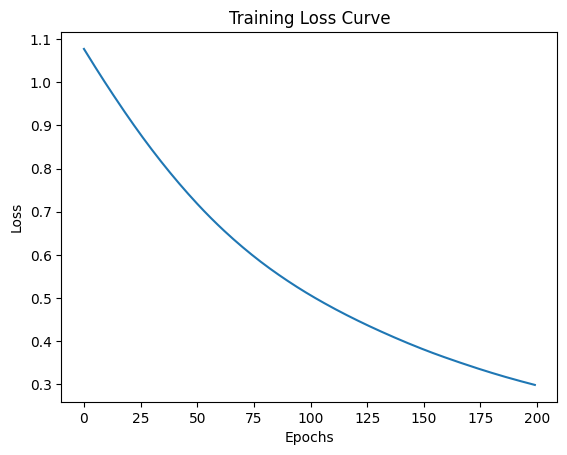

In [ ]:
plt.plot(model.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()


# **2**

# **Import Required Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import roc_curve, auc


# **Load IMDb Dataset (Top 10,000 Words)**

In [ ]:
vocab_size = 10000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Pad Sequences**

In [ ]:
max_len = 200

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


# **Split Training → Training + Validation (80/20)**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    random_state=42
)


# **Define the Neural Network**

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=10000, output_dim=64, input_length=max_len))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# **Compile the Model**

In [ ]:
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# **Train the Model**

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=12,
    batch_size=128,
    validation_data=(X_val, y_val)
)


Epoch 1/12
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.6202 - loss: 0.6118 - val_accuracy: 0.8558 - val_loss: 0.3246
Epoch 2/12
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - accuracy: 0.9414 - loss: 0.1724 - val_accuracy: 0.8596 - val_loss: 0.3274
Epoch 3/12
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.9945 - loss: 0.0372 - val_accuracy: 0.8602 - val_loss: 0.3591
Epoch 4/12
157/157 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.9994 - loss: 0.0082 - val_accuracy: 0.8612 - val_loss: 0.3899
Epoch 5/12
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.9999 - loss: 0.0032 - val_accuracy: 0.8626 - val_loss: 0.4104
Epoch 6/12
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.8630 - val_loss: 0.4280
Epoch 7/12
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.9999 - loss: 0.0014 - val_accuracy: 0.8612 - val_loss: 0.4530
Epoch 8/12
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 1.0000 - loss: 8.8808e-04 -

# **Print Model Summary**

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       409,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,148,997 (12.01 MB)

 Trainable params: 1,049,665 (4.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,099,332 (8.01 MB)

# **Evaluate on Official Test Data**

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8621 - loss: 0.5088
Test Accuracy: 0.8615999817848206


# **Plot Training & Validation Loss + Accuracy**

# **Loss Curve**

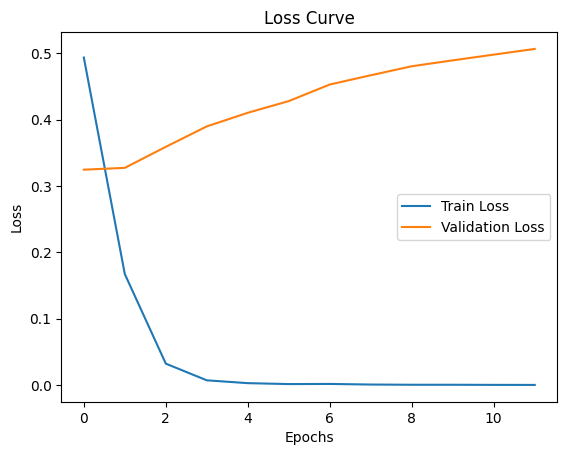

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve")
plt.show()


# **Accuracy Curve**

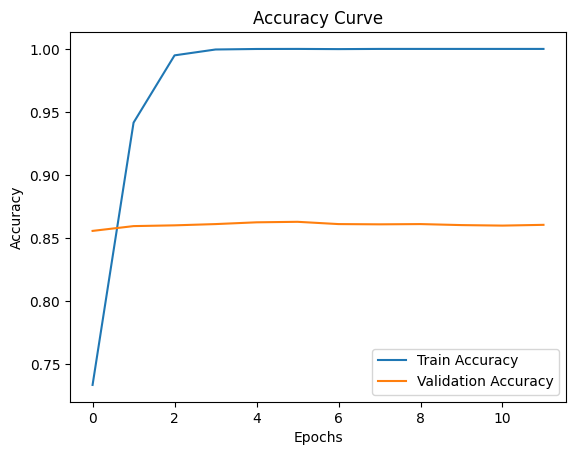

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()


# **ROC Curve & AUC**

# **Get prediction probabilities**

In [ ]:
y_pred_prob = model.predict(X_test).ravel()


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


# **ROC & AUC**

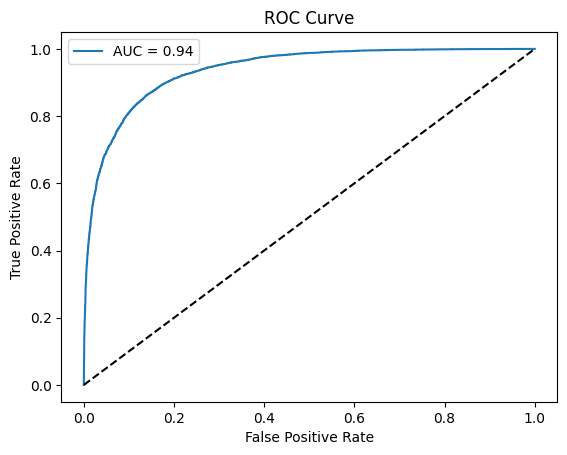

AUC: 0.9376904992


In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print("AUC:", roc_auc)


# **3**

# **Deep Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import time


In [ ]:
deep_model = Sequential()

deep_model.add(Embedding(input_dim=10000, output_dim=64, input_length=max_len))
deep_model.add(Flatten())

deep_model.add(Dense(64, activation='relu'))
deep_model.add(Dropout(0.2))

deep_model.add(Dense(32, activation='relu'))
deep_model.add(Dropout(0.2))

deep_model.add(Dense(16, activation='relu'))

deep_model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# **Compile the Model**

In [ ]:
deep_model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# **Train the Deep Model (Measure Time)**

In [ ]:
start_time = time.time()

history_deep = deep_model.fit(
    X_train, y_train,
    epochs=18,
    batch_size=128,
    validation_data=(X_val, y_val)
)

deep_training_time = time.time() - start_time


Epoch 1/18
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.6038 - loss: 0.6360 - val_accuracy: 0.8332 - val_loss: 0.3651
Epoch 2/18
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.9216 - loss: 0.2096 - val_accuracy: 0.8330 - val_loss: 0.4237
Epoch 3/18
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.9867 - loss: 0.0463 - val_accuracy: 0.8442 - val_loss: 0.6124
Epoch 4/18
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9983 - loss: 0.0073 - val_accuracy: 0.8502 - val_loss: 0.7739
Epoch 5/18
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 88ms/step - accuracy: 0.9966 - loss: 0.0110 - val_accuracy: 0.8474 - val_loss: 0.8033
Epoch 6/18
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 85ms/step - accuracy: 0.9970 - loss: 0.0086 - val_accuracy: 0.8404 - val_loss: 0.8516
Epoch 7/18
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.9986 - loss: 0.0045 - val_accuracy: 0.8432 - val_loss: 0.9297
Epoch 8/18
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 84ms/step - accuracy: 0.9984 - loss: 0.0053 - 

# **Print Model Summary**

In [ ]:
deep_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       819,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385,669 (16.73 MB)

 Trainable params: 1,461,889 (5.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,923,780 (11.15 MB)

# **Evaluate on Test Data**

In [ ]:
deep_test_loss, deep_test_accuracy = deep_model.evaluate(X_test, y_test)

print("Deep Model Test Accuracy:", deep_test_accuracy)
print("Deep Model Training Time:", deep_training_time)


782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8320 - loss: 1.4199
Deep Model Test Accuracy: 0.8313199877738953
Deep Model Training Time: 218.7995433807373


# **Confusion Matrix**

# **Shallow Model (from Question 2)**

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred_shallow = (model.predict(X_test) > 0.5).astype(int)
cm_shallow = confusion_matrix(y_test, y_pred_shallow)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


# **Deep Model**

In [ ]:
y_pred_deep = (deep_model.predict(X_test) > 0.5).astype(int)
cm_deep = confusion_matrix(y_test, y_pred_deep)


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


# **Print**

In [ ]:
print("Shallow Model Confusion Matrix:\n", cm_shallow)
print("Deep Model Confusion Matrix:\n", cm_deep)


Shallow Model Confusion Matrix:
 [[10738  1762]
 [ 1698 10802]]
Deep Model Confusion Matrix:
 [[10205  2295]
 [ 1922 10578]]


# **Overfitting Analysis**

# **Calculate Overfitting Gap**

In [ ]:
shallow_gap = history.history['accuracy'][-1] - history.history['val_accuracy'][-1]
deep_gap = history_deep.history['accuracy'][-1] - history_deep.history['val_accuracy'][-1]

print("Shallow Model Overfitting Gap:", shallow_gap)
print("Deep Model Overfitting Gap:", deep_gap)


Shallow Model Overfitting Gap: 0.13940000534057617
Deep Model Overfitting Gap: 0.1607000231742859
